# Wine Machine Learning Exercise: Classification and Regression

In this exercise, I've tackled two objectives. I worked with a dataset containing characteristics of different wines, such as acidity and density, among others. My task was to generate, train, validate, and test classification and regression models.

I sourced the dataset from the University of Minho, created by P. Cortez et al. It's available on the UC Irvine Machine Learning Repository. I've included the dataset description for reference.



```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009].
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.

5. Number of Instances: red wine - 1599; white wine - 4898.

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

In addition to the 12 variables described, the dataset I'll be working with includes another one: whether the wine is white or red. So, here are my objectives:

1. I'll start by splitting the dataset into training (and validation if I'm not using cross-validation) and testing sets. Before or after this step, I'll perform any necessary data transformations, variable selection, dimensionality reduction, etc. I might decide to use the data as it is...
2. My next goal is to build a model that can classify whether a wine is white or red as accurately as possible based on the remaining variables. I anticipate this task to be relatively straightforward, and I aim to achieve a high level of accuracy.
3. Finally, I'll develop a regression model that predicts the quality of the wines as accurately as possible.

Before diving into model building, I'll conduct any exploratory and statistical analysis, as well as create any necessary graphics.

Empezamos el ejercicio importando las librerias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAMOS EL DATASET DESDE EXCEL

Vamos a importar el dataset desde el excel que se nos ha proporcionado, para eso utilizaremos una herramiento de pandas, y a continuación haremos un describe para poder ojear el dataset, ya que será la primera vez que lo hagamos. Podremos ver los cuartiles, medias, minimos y máximos, y si vemos algún valor que nos llame especialmente la atención podríamos indagar en él.

In [ ]:
practica = pd.read_csv('C:/Users/Eric/Desktop/DATAHACK/TERCERA PRACTICA PYTHON/winequality.csv', sep=";")
practica

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,white


Antes de empezar, vamos a quitar todos los duplicados que pueda contener este dataset, lo haremos con drop_duplicates().

In [ ]:
practica = practica.drop_duplicates()
practica.reset_index(drop=True,inplace=True)
practica

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,7.50,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white
5316,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
5317,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
5318,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white


Como podemos apreciar, nuestro dataset ha perdido casi 1200 registros, ya que eran duplicados. Seguimos con la practica.

In [ ]:
practica.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


A modo de curiosidad, podemos ver como la calidad media de los vinos del dataset son inferiores a 6, y el mejor vino de todo el dataset tiene una nota de 9.
Vamos ahora con las correlaciones entre las variables. Vamos a verlo también gráficamente para que sea más facil a la vista de ver las correlaciones.

In [ ]:
practica.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


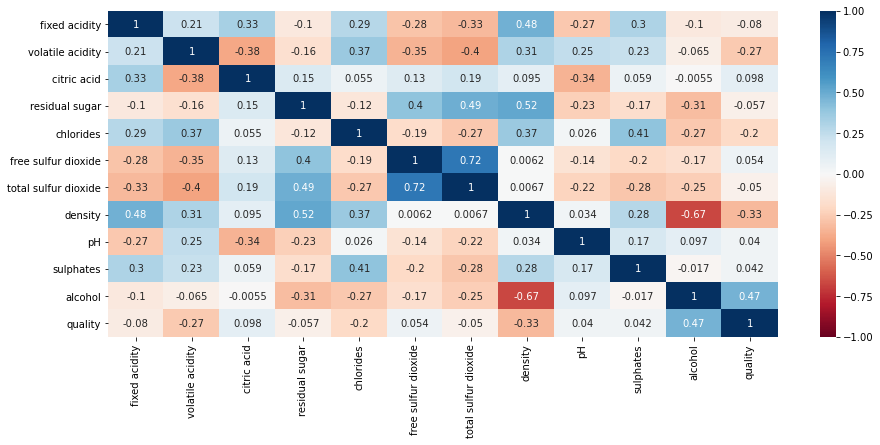

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(practica.corr(),
            vmin=-1.0,
            vmax=1.0,
            annot=True,
            cmap="RdBu")

pass

Y por último antes de empezar con los modelos, vemos si tenemos algún valor nulo con el .info y el tipo que tienen los resultados de las variables.


In [ ]:
practica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


A raíz de esto, podemos ver que color es una variable cuyos valores son strings, así que para la generación de los modelos, necesitaremos que pasen a ser números, en este caso, le daremos el valor 0 a red, y 1 a white. Como lo conocemos nosotros, vino tinto será 0 y vino blanco será 1.

In [ ]:
practica["color"]

0         red
1       white
2       white
3         red
4       white
        ...  
5315    white
5316    white
5317    white
5318    white
5319    white
Name: color, Length: 5320, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
label_encoder.fit(practica["color"])
practica["color"] = label_encoder.transform(practica["color"])

<ipython-input-162-0dd729282bad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practica["color"] = label_encoder.transform(practica["color"])


Vamos a hacer ahora un print del dataset para ver si color ha pasado a 0s y 1s.

In [ ]:
practica["color"]

0       0
1       1
2       1
3       0
4       1
       ..
5315    1
5316    1
5317    1
5318    1
5319    1
Name: color, Length: 5320, dtype: int32

Perfecto, ahora sí, pasamos a la generación de los modelos. Primero, necesitamos que el modelo nos prediga el color del vino, el cual puede ser o rojo o blanco. Separamos las variables y el target en x y y.

In [ ]:
x = practica[['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
y = practica[['color']]

Una vez hecha la separación, vamos a definir el train y el test, en este caso, vamos a utilizar el 80% del dataset para el train y el resto para el test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

A modo de comprobación, vamos a ver si hemos hecho bien la separación, así que vamos a hacer un print de las 4 variables para ver el tamaño de las muestras.

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4256, 12), (4256, 1), (1064, 12), (1064, 1))

Perfecto, ahora sí, vamos con los modelos. Para este primer apartado, vamos a hacerlo con 3 modelos distintos, hemos elegido Decision Tree, Random Forest y Gradient Boosting.

# DECISION TREE CLASSIFIER

Importamos el modelo de la libreria de sklearn y lo ejecutamos, vamos a hacerlo con una profundida de 4. Luego pediremos que nos haga una predicción basandose en el test y veremos el score o la tasa de acierto.

In [ ]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(max_depth=4)
arbol_decision.fit(X_train, y_train)
arbol_decision.score(X_test, y_test)

y_prediccion = arbol_decision.predict(X_test)
score_arbol = arbol_decision.score(X_test, y_test)
score_arbol

0.9708646616541353

97%, el modelo nos está dando un score muy muy alto. Nos podríamos conformar con este modelo, vamos a probar con otros para comprobar que no haya sido casualidad. Antes de terminar, sacamos la matriz de confusión donde podremos ver los aciertos y los fallos en cuanto a la predicción.

In [ ]:
y_prediccion = arbol_decision.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prediccion)

array([[246,  18],
       [ 13, 787]], dtype=int64)

En la matriz podemos ver que los falsos verdaderos y los falsos negativos son apenas inexistentes, algo normal, viendo el score que nos ha dado el modelo. Por último, vamos a representar esta matriz con el SEABORN HEATMAP, donde como antes hemos comentado, 0 será RED, o vino tinto, y 1 será white, o vino blanco.

# SEABORN HEATMAP DECISION TREE

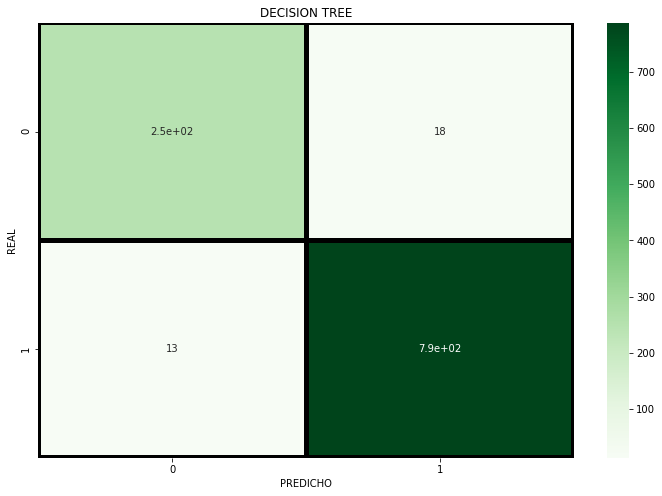

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(confusion_matrix(y_test, y_prediccion),
            annot=True,
            linewidths=4,
            linecolor="k",
            cmap="Greens")
ax.set(title="DECISION TREE",
      xlabel="PREDICHO",
      ylabel="REAL",)
pass

# RANDOM FOREST CLASSIFIER

Vamos a seguir los mismos pasos que en el modelo anterior, pero ahora con el RANDOM FOREST. Entrenaremos el modelo, veremos su score, y por último haremos la matriz y lo representaremos.

In [ ]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())
score_rforest = random_forest.score(X_test, y_test)
score_rforest

0.9943609022556391

In [ ]:
y_prediccion2 = random_forest.predict(X_test)

confusion_matrix(y_test, y_prediccion2)

array([[260,   4],
       [  2, 798]], dtype=int64)

Vemos que este modelo tiene incluso más score que el anterior, con lo cual ahora los falsos positivos y negativos son incluso inferiores a los de la matriz de antes. Vamos a verlo con el SEABORN HEATMAP, y pasamos al último modelo.

# SEABORN HEATMAP RANDOM FOREST

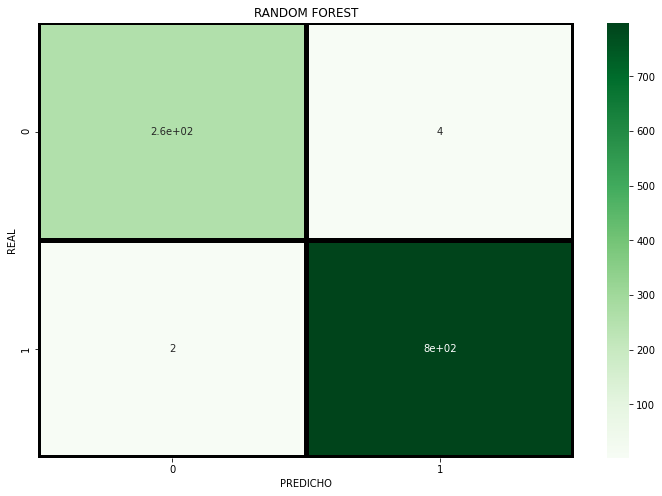

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(confusion_matrix(y_test, y_prediccion2),
            annot=True,
            linewidths=4,
            linecolor="k",
            cmap="Greens")
ax.set(title="RANDOM FOREST",
      xlabel="PREDICHO",
      ylabel="REAL",)
pass

# GRADIENT BOOSTING CLASSIFIER

Vamos con el último modelo de este ejercicio, vamos con lo mismo que los últimos dos.

In [ ]:
gradient_boosting = ensemble.GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train.values.ravel())
score_gboosting = gradient_boosting.score(X_test, y_test)
score_gboosting

0.9906015037593985

In [ ]:
y_prediccion3 = gradient_boosting.predict(X_test)

confusion_matrix(y_test, y_prediccion3)

array([[258,   6],
       [  4, 796]], dtype=int64)

Este modelo, al igual que el anterior, roza el 100% de acierto. Vamos con la representación gráfica de la matriz, y pasamos con la comparación de los 3 modelos.

# SEABORN HEATMAP

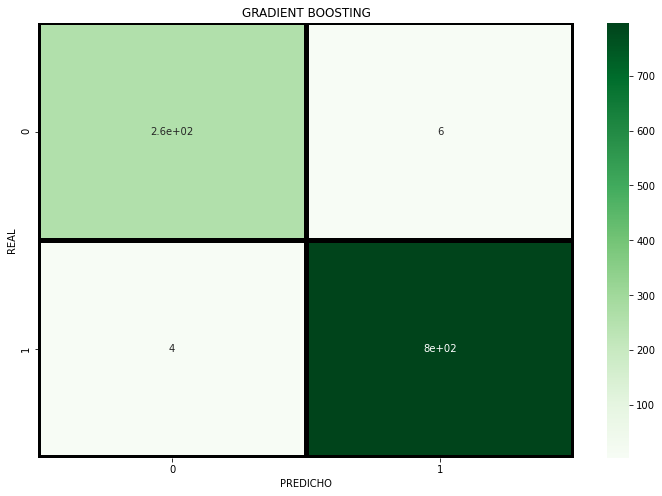

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(confusion_matrix(y_test, y_prediccion3),
            annot=True,
            linewidths=4,
            linecolor="k",
            cmap="Greens")

ax.set(title="GRADIENT BOOSTING",
      xlabel="PREDICHO",
      ylabel="REAL",)
pass

# ROC CURVE

Para poder comparar los 3 modelos que hemos elegido para este ejercicio, vamos a hacerlo a través de la ROC CURVE.

In [ ]:
r_probs = [0 for _ in  range(len(y_test))]
dt_probs = arbol_decision.predict_proba(X_test)
rf_probs = random_forest.predict_proba(X_test)
gb_probs = gradient_boosting.predict_proba(X_test)



In [ ]:
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

Hemos creado una predicción aleatoria, ya que al resultado poder ser o 0 o 1, la posibilidad de acierto será del 50%. Vamos a hacer un print de todo junto que será lo que podremos en la leyenda, y pasamos con la construcción de la curva.

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random forest: AUROC = %.3f' % (rf_auc))
print('Gradient boosting: AUROC = %.3f' % (gb_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.971
Random forest: AUROC = 0.994
Gradient boosting: AUROC = 0.991


In [ ]:
from sklearn.metrics import roc_curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)


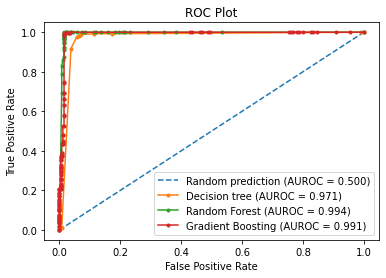

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()

plt.show()

Y con esto terminamos este ejercicio, ya podíamos predecir viendo los resultados de los diferente score que la curva ROC no nos iba a decir mucho, ya que los 3 modelos son muy buenos.

# MODELO REGRESOR

Para este tercer ejercicio, se nos pide que hagamos un modelo que pueda predecir qué calidad tendrá el vino, en una escala del 1 al 10. Empezamos separando de nuevo x e y, en este caso, la variable target será "quality".

In [ ]:
X2 = practica[['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']]
y2 = practica[['quality']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

A modo de comprobación como hemos hecho en el anterior ejercicio, vamos a ver el tamaño de las muestras que hemos elegido para el train y el test, como antes, 80/20.

In [ ]:
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((4256, 12), (4256, 1), (1064, 12), (1064, 1))

# LINEAR REGRESSION

Vamos con la elección de modelos, en este caso, vamos a realizar una regresión lineal y un random forest regresivo. Mismos pasos que antes, vamos a importar el modelo, lo entrenamos, predecimos en comparación con el test y vemos el score y el % de acierto del modelo.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mod_linear = linear_model.LinearRegression()

In [ ]:
mod_linear.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y_pred_linear = mod_linear.predict(X2_test)

Ya tenemos el modelo entrenado y hemos hecho la predicción, así que vamos a imprimir ciertos valores que nos servirán de ayuda para ver cómo de eficaz ha sido nuestro modelo, sacamos el error cuadrático medio y su raíz, y el coeficiente de terminación, para ver si la predicción ha sido buena o no.

In [ ]:
print('Mean squared error (MSE): %.2f'
     % mean_squared_error (y2_test, y_pred_linear))
print('RMSE:',str(mean_squared_error (y2_test, y_pred_linear)))
print('Coefficient of determination (R^2): %.2f'
     % r2_score(y2_test, y_pred_linear))

Mean squared error (MSE): 0.57
RMSE: 0.56557515366098
Coefficient of determination (R^2): 0.26


In [ ]:
mod_linear.score(X2_test, y2_test)

0.25812871157431294

Viendo los resultados, podemos ver como el modelo que hemos elegido no es del todo bueno, nos está acertando casi un 26% y además vemos como el RMSE es de casi 0.56 puntos, es decir, las predicciones las está haciendo con más de medio punto de error. Tendremos que probar otro modelo.

# RANDOM FOREST REGRESSION

Vamos a probar un RANDOM FOREST REGRESSION, vamos con los mismos pasos que hemos seguido en el modelo anterior y comentamos los resultados.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforestr = RandomForestRegressor(n_estimators = 30)
rforestr.fit(X2_train, y2_train.values.ravel())

RandomForestRegressor(n_estimators=30)

In [ ]:
y_predict_rforestr = rforestr.predict((X2_test))

In [ ]:
from sklearn import metrics
r_square_rforestr = metrics.r2_score(y2_test, y_predict_rforestr)

print('R^2 error:', r_square_rforestr)
print('Mean squared error (MSE): %.2f'
     % mean_squared_error (y2_test, y_predict_rforestr))
print('RMSE:',str(mean_squared_error (y2_test, y_predict_rforestr)))

R^2 error: 0.32528784393453225
Mean squared error (MSE): 0.51
RMSE: 0.51437552213868


In [ ]:
rforestr.score(X2_test, y2_test)

0.32528784393453225

Una vez entrenado el modelo y hecha la predicción, podemos ver que el modelo tiene casi un 32% de acierto, es mayor que el anterior, pero vemos que no es del todo bueno. Además, los errores nos los da con 0.51 puntos de diferencia, de nuevo, inferior al anterior modelo, pero no es suficientemente bueno comparado con el segundo ejercicio donde las predicciones eran paracticamente del 100%.

Para intentar mejorar este modelo, hemos aumentado el numero de n_estimators a 100. Veamos si hemos mejorado el modelo con esto.

In [ ]:
rforestr = RandomForestRegressor(n_estimators = 100)
rforestr.fit(X2_train, y2_train.values.ravel())
y_predict_rforestr = rforestr.predict((X2_test))
from sklearn import metrics
r_square_rforestr = metrics.r2_score(y2_test, y_predict_rforestr)

print('R^2 error:', r_square_rforestr)
print('Mean squared error (MSE): %.2f'
     % mean_squared_error (y2_test, y_predict_rforestr))
print('RMSE:',str(mean_squared_error (y2_test, y_predict_rforestr)))
print('Score: ', rforestr.score(X2_test, y2_test) )

R^2 error: 0.3509301413098389
Mean squared error (MSE): 0.49
RMSE: 0.4948267857142857
Score:  0.3509301413098389


Vemos que con este cambio, el modelo mejora pero no de manera sustancial, así que podemos concluir que con estos dos modelos regresivos que hemos utilizado, no podemos predecir a la perfección cual será la calidad del vino.